# Usando o algoritmo árvore de decisão para classificar tipos de tumores mamários

**Sobre os dados**

Os dados são de tumores de câncer de mama e as features calculadas a partir de uma imagem digitalizada de um aspirado por agulha fina (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.
O dataset em questão foi obtido na plataforma Kaggle [aqui](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) e possui as seguintes variáveis:

**1)** Número de identificação

**2)** Diagnóstico (**M = maligno, B = benigno**)

**3)** raio (média das distâncias do centro aos pontos do perímetro)

**4)** textura (desvio padrão dos valores da escala de cinza)

**5)** perímetro

**6)** área

**7)** lisura (variação local nos comprimentos do raio)

**8)** compacidade (perímetro ^ 2 / área - 1,0)

**9)** concavidade (gravidade das partes côncavas do contorno)

**10)** pontos côncavos (número de partes côncavas do contorno)

**11)** simetria

**12)** dimensão fractal

Para cada features serão usadas a suas médias (mean), desvios-padrões (se) e "pior" ou maior (worst) para classificação.

**Objetivo do projeto**

O objetivo desse projeto é usar o Algoritmo de Árvore de Decisão e identificar, a partir das características de tumores mamários, se um tumor é do tipo Maligno (M) ou do tipo Benigno (B).

**ATRIBUINDO O DATASET A UMA VARIÁVEL**

In [1]:
diag='cancer.csv'

In [2]:
diag

'cancer.csv'

**IMPORTANDO A BIBLIOTECA PANDAS E NUMPY**

In [3]:
import pandas as pd
import numpy as np

**IMPORTANDO BASE DE DADOS**

In [4]:
diagnostico=pd.read_csv(diag,sep=',',header=0)

**VISUALIZANDO O CONJUNTO DE DADOS**

In [5]:
diagnostico.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**VISUALIZANDO OS TIPOS DE DADOS DAS COLUNAS DO CONJUNTO DE DADOS**

In [6]:
#Como pode-se observar a maioria das colunas do conjunto de dados é do tipo float

diagnostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

**VISUALIZANDO SE O CONJUNTO DE DADOS POSSUI VALORES FALTANTES**

In [7]:
#Não há valores faltantes na base de dados

diagnostico.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**ESTATÍSTICAS DESCRITIVAS DA BASE DE DADOS**

In [8]:
diagnostico.describe().T

#tabela contendo as estatísticas descritivas de cada coluna do dataset

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**VISUALIZAÇÃO DE DADOS**

**IMPORTANDO BIBLIOTECAS SEABORN E MATPLOTLIB**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#importando estilo 'ggplot' que será aplicado nos gráfico gerados

plt.style.use('ggplot')

**VISUALIZANDO AS DISTRIBUIÇÕES DAS COLUNAS DA BASE DE DADOS**

**DISTRIBUIÇÕES DAS COLUNAS DAS FEATURES (MÉDIA)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002020ED8CF60>,
      dtype=object)

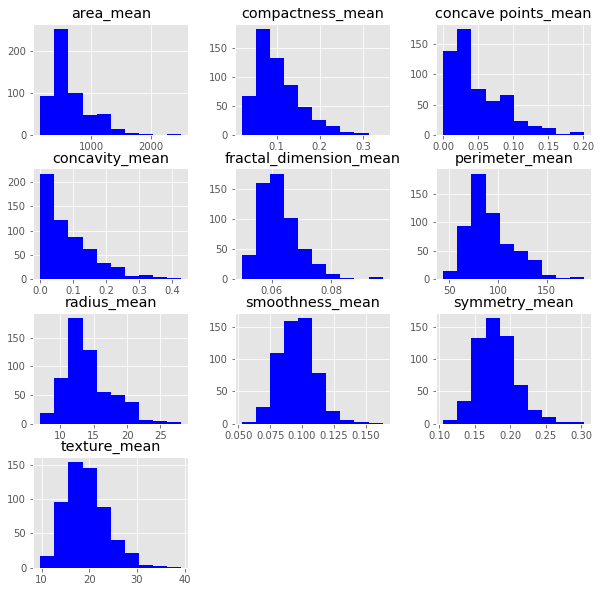

In [11]:
diagnostico[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
             'compactness_mean','concavity_mean','concave points_mean','symmetry_mean',
             'fractal_dimension_mean']].hist(figsize=(10,10),color = "blue")

**DISTRIBUIÇÕES DAS COLUNAS DAS FEATURES (STANDARD ERROR)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002020F30CA90>,
      dtype=object)

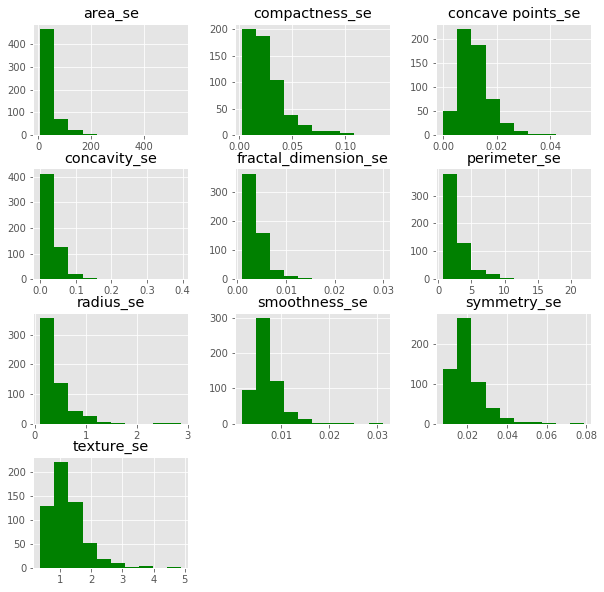

In [12]:
diagnostico[['radius_se','texture_se','perimeter_se','area_se','smoothness_se',
             'compactness_se','concavity_se','concave points_se',
             'symmetry_se','fractal_dimension_se']].hist(figsize=(10,10),color = "green")

**DISTRIBUIÇÕES DAS COLUNAS DAS FEATURES (WORST)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002020FCA13C8>,
      dtype=object)

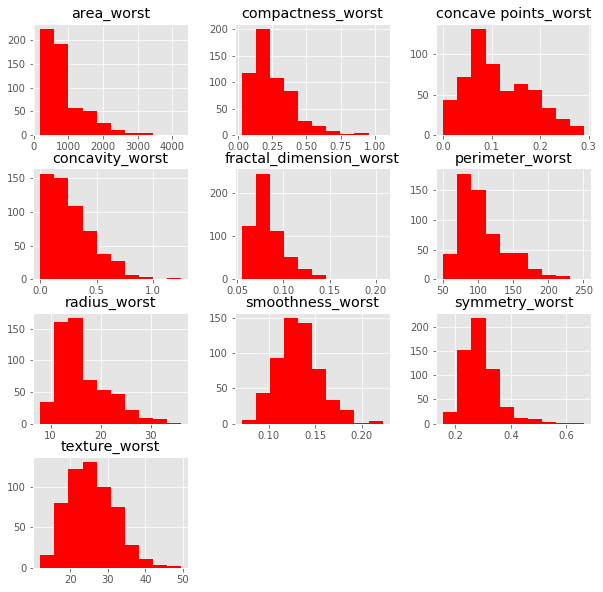

In [13]:
diagnostico[['radius_worst','texture_worst','perimeter_worst',
                            'area_worst','smoothness_worst','compactness_worst',
                            'concavity_worst','concave points_worst','symmetry_worst',
                            'fractal_dimension_worst']].hist(figsize=(10,10),color = "red")

**VISUALIZANDO A CORRELAÇÃO ENTRE AS FEATURES DE MÉDIA**

**MEAN (MÉDIA)**

In [14]:
#atribuindo a uma variável a correlação entre as features de média

correlacoes=diagnostico[['radius_mean','texture_mean','perimeter_mean',
                         'area_mean','smoothness_mean','compactness_mean',
                         'concavity_mean','concave points_mean','symmetry_mean',
                         'fractal_dimension_mean']].corr()

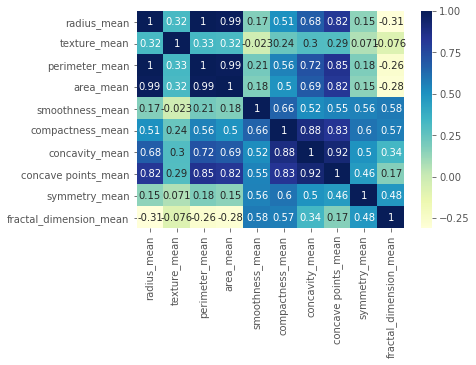

In [15]:
#plotando o gráfico de correlação entre as features de média

%matplotlib inline
sns.heatmap(correlacoes, annot = True, cmap = "YlGnBu")

**STANDARD ERROR (ERRO PADRÃO)**

In [16]:
#atribuindo a uma variável a correlação entre as features de erro padrão

correlacoes2 = diagnostico[['radius_se','texture_se',
                            'perimeter_se','area_se','smoothness_se',
                            'compactness_se','concavity_se','concave points_se',
                            'symmetry_se','fractal_dimension_se']].corr()

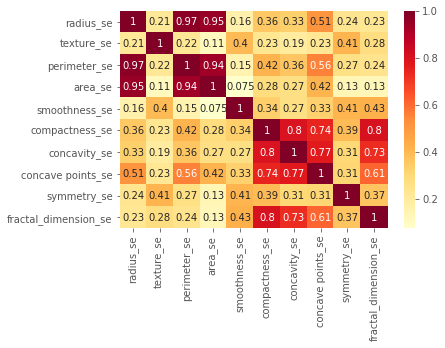

In [17]:
#plotando o gráfico de correlação entre as features de erro padrão

%matplotlib inline
sns.heatmap(correlacoes2, annot = True, cmap = "YlOrRd")

**WORST**

In [18]:
#atribuindo a uma variável a correlação entre as features de worst

correlacoes3 = diagnostico[['radius_worst','texture_worst','perimeter_worst',
                            'area_worst','smoothness_worst','compactness_worst',
                            'concavity_worst','concave points_worst','symmetry_worst',
                            'fractal_dimension_worst']].corr()

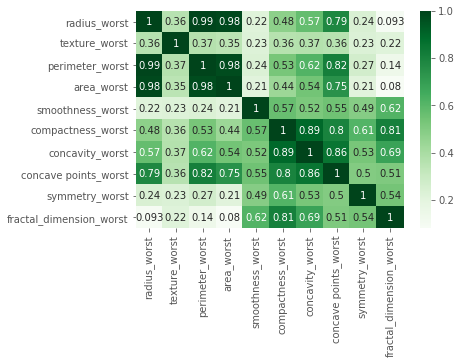

In [19]:
#plotando o gráfico de correlação entre as features worst

%matplotlib inline
sns.heatmap(correlacoes3, annot = True, cmap = "Greens")

**CONTAGEM DAS CLASSES**

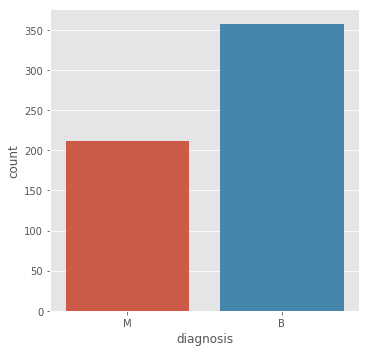

In [20]:
diagnostico=pd.read_csv(diag,sep=',',header=0)
sns.catplot(x="diagnosis", kind="count", data=diagnostico)

**EXCLUINDO AS COLUNAS "Unnamed:32" E "id"**

In [21]:
diagnostico.drop(['Unnamed: 32'], axis=1,inplace=True)
diagnostico.drop(['id'], axis=1,inplace=True)

**SEPARANDO OS DADOS PARA TREINO E TESTE DO ALGORITMO DE ÁRVORE DE DECISÃO**

In [22]:
#atribuindo a 'y' a variável de resultado, que no caso é a coluna'diagnosis' que trás os resultados 'M' de maligno e 
#'B' de benigno, ou seja, os tipos de tumores a serem classificados.

y=diagnostico['diagnosis']

In [23]:
#Atribuindo a 'X' a demais variáveis

X=diagnostico.drop(['diagnosis'],axis=1)

**IMPORTANDO MÓDULO TRAIN_TEST_SPLIT**

In [24]:
from sklearn.model_selection import train_test_split

**APLICANDO TRAIN_TEST_SPLIT AOS DADOS**

In [25]:
#O train_test_split irá dividir os dados. Uma parte dos dados será para treinar o algortimo de árvore de decisão (treino) e os
#e os outros dados para testar o quanto o algoritmo acerta.

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,random_state=42)

In [26]:
X_treino.shape

(426, 30)

In [27]:
y_treino.shape

(426,)

In [28]:
X_teste.shape

(143, 30)

In [29]:
y_teste.shape

(143,)

**IMPORTANDO E TREINANDO A ÁRVORE DE DECISÃO**

In [30]:
from sklearn import tree
arvore=tree.DecisionTreeClassifier()
arvore.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
resultado=arvore.predict(X_teste)
resultado

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

**MATRIZ DE CONFUSÃO**

Vamos agora usar a matriz de confusão para visualizar o quanto o modelo confundiu de uma classe para outra.

In [33]:
print(pd.crosstab(y_teste,resultado,rownames=['Real'],colnames=['Predito'],margins=True))

#Para a classe 'B' o modelo acertou 85 observações de 89 e confundiu 4 observações com a classe 'M'.

#Para a classe 'M' o modelo acertou 51 observações de 54 e confundiu 3 observações com a classe 'B'.

Predito   B   M  All
Real                
B        85   4   89
M         3  51   54
All      88  55  143


**APLICANDO CROSS-VALIDATION**

In [34]:
#imptando o módulo para validação cruzada

from sklearn.model_selection import cross_val_predict

In [35]:
resultados = cross_val_predict(arvore,X,y,cv=10)

In [83]:
#importando módulo metrics
from sklearn import metrics

#Como pode-se ver a acurácia média do modelo é de 91.03%.

print(metrics.accuracy_score(y,resultados)*100)

91.03690685413005


**IMPORTANDO O MÓDULO MÉTRICS**

In [38]:
from sklearn import metrics

In [39]:
print(metrics.classification_report(y_teste,resultado))

#Para classe 'B', o modelo teve uma precisão

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        89
           M       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



**FEATURES MAIS IMPORTANTES**

In [40]:
#Vamos agora observar quais as features mais importantes para o modelo de árvore de decisão.

arvore.feature_importances_

array([0.        , 0.02601101, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.72468105, 0.00670697, 0.        ,
       0.01277192, 0.        , 0.        , 0.        , 0.00155458,
       0.        , 0.        , 0.01702539, 0.        , 0.00838371,
       0.05899273, 0.09949554, 0.        , 0.03452044, 0.00985664,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [41]:
feature_imp=pd.Series(arvore.feature_importances_,index=X_treino.columns)
feature_imp

radius_mean                0.000000
texture_mean               0.026011
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave points_mean        0.724681
symmetry_mean              0.006707
fractal_dimension_mean     0.000000
radius_se                  0.012772
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.000000
smoothness_se              0.001555
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0.017025
symmetry_se                0.000000
fractal_dimension_se       0.008384
radius_worst               0.058993
texture_worst              0.099496
perimeter_worst            0.000000
area_worst                 0.034520
smoothness_worst           0.009857
compactness_worst          0.000000
concavity_worst            0.000000
concave points_worst       0

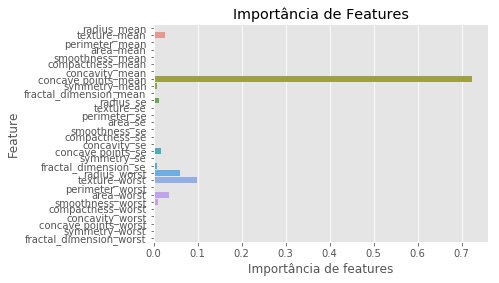

In [43]:
%matplotlib inline
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Importância de features')
plt.ylabel('Feature')
plt.title('Importância de Features')
plt.show()

#Podemos ver no gráfico abaixo que as features mais importantes para o modelo de árvore de decisão foram:
#texture_mean               0.026011
#concave points_mean        0.724681
#symmetry_mean              0.006707
#radius_se                  0.012772
#smoothness_se              0.001555
#concave points_se          0.017025
#fractal_dimension_se       0.008384
#radius_worst               0.058993
#texture_worst              0.099496
#area_worst                 0.034520
#smoothness_worst           0.009857

**VISUALIZANDO A ÁRVORE DE DECISÃO**

In [44]:
#importando bibliotecas para impressão da árvore de decisão

import pydot
import graphviz 
from ipywidgets import interactive

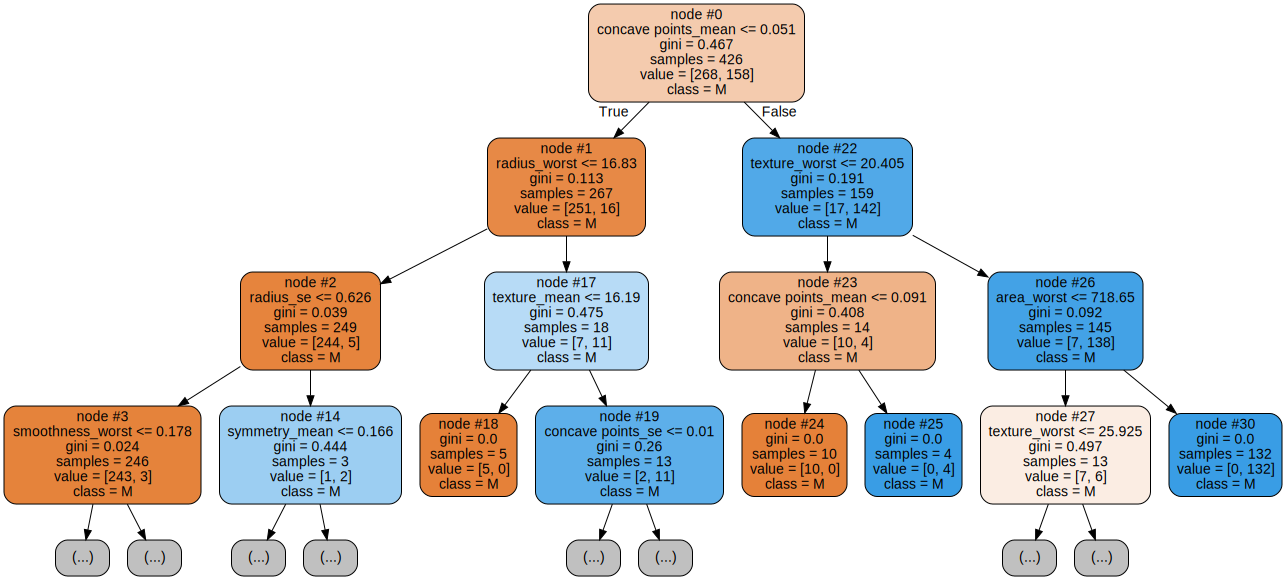

In [45]:
#imprimindo árvore de decisão

dot_data = tree.export_graphviz(
         arvore,
         feature_names=X.columns,
         class_names=y,
         max_depth=3, 
         filled=True, 
         rounded=True,
         node_ids=True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph

**RENDERIZAÇÃO DA ÁRVORE DE DECISÃO**

Renderizar uma árvore de decisão é gerar uma forma interativa de manipular a árvore alterando os seus parâmetros. Logo a seguir iremos criar um caixa de interação e poderemos ter mais liberdade para manipular nossa árvore de decisão.

In [46]:
#importando bibliotecas

from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [47]:
diagnostico=pd.read_csv(diag,sep=',',header=0)
diagnostico.drop(['Unnamed: 32'], axis=1,inplace=True)
diagnostico.drop(['id'], axis=1,inplace=True)


features_label = diagnostico.columns[1:]
class_label = diagnostico.columns[0]

In [48]:
#Aqui criaremos uma função que será alimentada pelos parâmetros e será usada para gerar o display.

def plot_tree(crit,split,depth,min_split,min_leaf=0.2):
    estimator=tree.DecisionTreeClassifier(
        random_state=42,
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf
    )
    estimator.fit(X,y)
    graph=Source(tree.export_graphviz(estimator,
                                      out_file=None,
                                      feature_names=features_label,
                                      class_names=class_label,
                                      filled=True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

In [49]:
#Gerando o display interativo.

inter=interactive(plot_tree,
                  crit=["gini","entropy"],
                  split=["best","random"],
                  depth=[1,2,3,4,5],
                  min_split=(0.1,1),
                  min_leaf=(0.1,0.5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**NAVEGANDO PELA ÁRVORE DE DECISÃO**

In [50]:
#Separando os dados para treino e teste novamente

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,random_state=42)

In [51]:
#treinando novamente o modelo de árvore de regressão

estimator=tree.DecisionTreeClassifier(max_leaf_nodes=3,random_state=42)
estimator.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [52]:
n_nodes=estimator.tree_.node_count #contagem de nós
children_left=estimator.tree_.children_left #índices a esquerda
children_right=estimator.tree_.children_right #índices a direita
feature=estimator.tree_.feature
threshold=estimator.tree_.threshold

In [53]:
print("Números de nós: {}".format(n_nodes))
print("Índices a esquerda : {}".format(children_left))
print("Índices a direita : {}".format(children_right))
print("Feature : {}".format(feature))
print("Limite/Threshold : {}".format(threshold))

Números de nós: 5
Índices a esquerda : [ 1  3 -1 -1 -1]
Índices a direita : [ 2  4 -1 -1 -1]
Feature : [ 7 20 -2 -2 -2]
Limite/Threshold : [ 0.05128    16.82999992 -2.         -2.         -2.        ]


In [54]:
node_depth=np.zeros(shape=n_nodes,dtype=np.int64)
is_leaves=np.zeros(shape=n_nodes, dtype=bool)
stack=[(0,-1)]

while len(stack)>0:
    node_id, parent_depth=stack.pop()
    node_depth[node_id]=parent_depth+1
    if(children_left[node_id]!=children_right[node_id]):
        stack.append((children_left[node_id],parent_depth+1))
        stack.append((children_right[node_id],parent_depth+1))
        
print("\n A árvore binária tem %s nós e a seguinte estrutura : \n"
      % n_nodes)

for i in range(n_nodes):
    if is_leaves[i]:
        print("%s nó = %s (nó folha)." %(node_depth[i]* "\t",i))
    else:
        print("%s nós = %s (nó teste): vai para o nó %s se o valor atributo %s <= %s \n se não, vai para o nó %s"\
              %(node_depth[i]*"\t",
                i,
                children_left[i],
                features_label[feature[i]],
                threshold[i],
                children_right[i])) 


 A árvore binária tem 5 nós e a seguinte estrutura : 

 nós = 0 (nó teste): vai para o nó 1 se o valor atributo concave points_mean <= 0.05127999931573868 
 se não, vai para o nó 2
	 nós = 1 (nó teste): vai para o nó 3 se o valor atributo radius_worst <= 16.829999923706055 
 se não, vai para o nó 4
	 nós = 2 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1
		 nós = 3 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1
		 nós = 4 (nó teste): vai para o nó -1 se o valor atributo symmetry_worst <= -2.0 
 se não, vai para o nó -1


Podemos também refazer o modelo de árvore de decisão e usarmos apenas as features mais importantes dessa vez.

**IMPORTANDO NOVAMENTE O DATASET**

In [57]:
diagnostico=pd.read_csv(diag,sep=',',header=0)

In [58]:
#Atribuindo a uma variável o dataset com apenas as features consideradas importantes para o modelo de árvore de decisão

diagnostico1 = diagnostico[['diagnosis','texture_mean','concave points_mean','symmetry_mean',
                            'radius_se', 'smoothness_se', 'concave points_se', 'fractal_dimension_se',
                            'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst']]




In [59]:
diagnostico1.head()

,diagnosis,texture_mean,concave points_mean,symmetry_mean,radius_se,smoothness_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst
0,M,10.38,0.14710,0.2419,1.0950,0.006399,0.01587,0.006193,25.38,17.33,2019.0,0.1622
1,M,17.77,0.07017,0.1812,0.5435,0.005225,0.01340,0.003532,24.99,23.41,1956.0,0.1238
2,M,21.25,0.12790,0.2069,0.7456,0.006150,0.02058,0.004571,23.57,25.53,1709.0,0.1444
3,M,20.38,0.10520,0.2597,0.4956,0.009110,0.01867,0.009208,14.91,26.50,567.7,0.2098
4,M,14.34,0.10430,0.1809,0.7572,0.011490,0.01885,0.005115,22.54,16.67,1575.0,0.1374


**PLOTANDO O GRÁFICO DE CORRELAÇÃO DO NOVO DATASET**

In [60]:
correlacoes4=diagnostico1.corr()

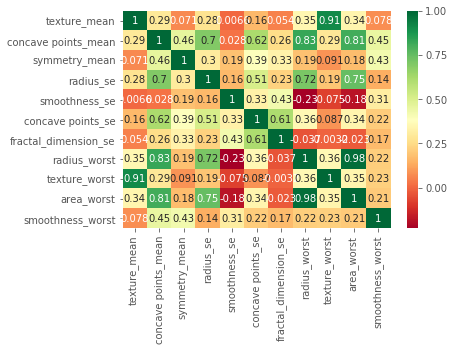

In [61]:
%matplotlib inline
sns.heatmap(correlacoes4, annot = True, cmap= "RdYlGn")

**ATRIBUINDO VARIÁVEIS DE TREINO E TESTE NOVAMENTE**

In [62]:
y2=diagnostico1['diagnosis']

In [63]:
X2=diagnostico1.drop(['diagnosis'],axis=1)

**SEPARANDO OS DADOS DE TREINO E TESTE**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X2_treino,X2_teste,y2_treino,y2_teste = train_test_split(X2,y2,random_state=42)

In [66]:
X2_treino.shape

(426, 11)

In [67]:
y2_treino.shape

(426,)

In [68]:
X2_teste.shape

(143, 11)

In [69]:
y2_teste.shape

(143,)

**TREINANDO NOVAMENTE O MODELO DE ÁRVORE DE DECISÃO**

In [70]:
from sklearn import tree
arvore2=tree.DecisionTreeClassifier()
arvore2.fit(X2_treino,y2_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
resultado2=arvore2.predict(X2_teste)
resultado2

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

**MATRIZ DE CONFUSÃO**

In [72]:
print(pd.crosstab(y2_teste,resultado2,rownames=['Real'],colnames=['Predito'],margins=True))

#Para a classe 'B' o modelo acertou 85 observações de 89 e confundiu 4 observações com a classe 'M'.
#Para a classe 'M' o modelo acertou 52 observações de 56 e confundiu 2 observações com a classe 'B'.

#Aparentemente não houveram mudanças

Predito   B   M  All
Real                
B        83   6   89
M         3  51   54
All      86  57  143


**APLICANDO CROSS-VALIDATION**

In [73]:
resultados2 = cross_val_predict(arvore2,X2,y2,cv=10)

In [74]:
print(metrics.accuracy_score(y2,resultados2)*100)

#Como podemos observar, houve uma melhora na acurácia do modelo em relação ao anterior.
#A acurácia subiu de 91.03% para 93.67%

93.67311072056239


**MÉTRICAS DE AVALIAÇÃO**

In [75]:
from sklearn import metrics

In [76]:
print(metrics.classification_report(y2_teste,resultado2))

              precision    recall  f1-score   support

           B       0.97      0.93      0.95        89
           M       0.89      0.94      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



**FEATURES MAIS IMPORTANTES**

In [77]:
#Vamos agora observar novamente as features mais importantes desse novo modelo

arvore2.feature_importances_

array([0.        , 0.72468105, 0.        , 0.01277192, 0.00155458,
       0.01702539, 0.00670697, 0.06737645, 0.12550655, 0.03452044,
       0.00985664])

In [78]:
feature_imp=pd.Series(arvore2.feature_importances_,index=X2_treino.columns)

In [79]:
feature_imp

texture_mean            0.000000
concave points_mean     0.724681
symmetry_mean           0.000000
radius_se               0.012772
smoothness_se           0.001555
concave points_se       0.017025
fractal_dimension_se    0.006707
radius_worst            0.067376
texture_worst           0.125507
area_worst              0.034520
smoothness_worst        0.009857
dtype: float64

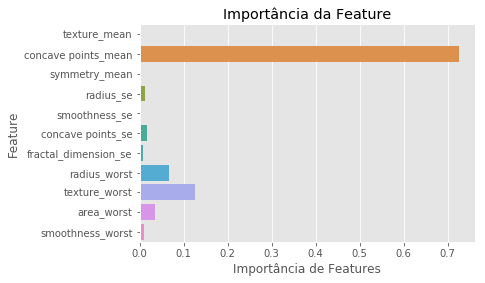

In [80]:
%matplotlib inline
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Importância de Features')
plt.ylabel('Feature')
plt.title("Importância da Feature")
plt.show()

#Diferente do modelo anterior a feature 'smoothness_se' perdeu sua importância nesse novo modelo, enquanto a feature
#teve um pequeno aumento de importância. Todas as outras features mantiverem-se com o mesmo nível de importância.

**PLOTANDO A NOVA ÁRVORE DE DECISÃO**

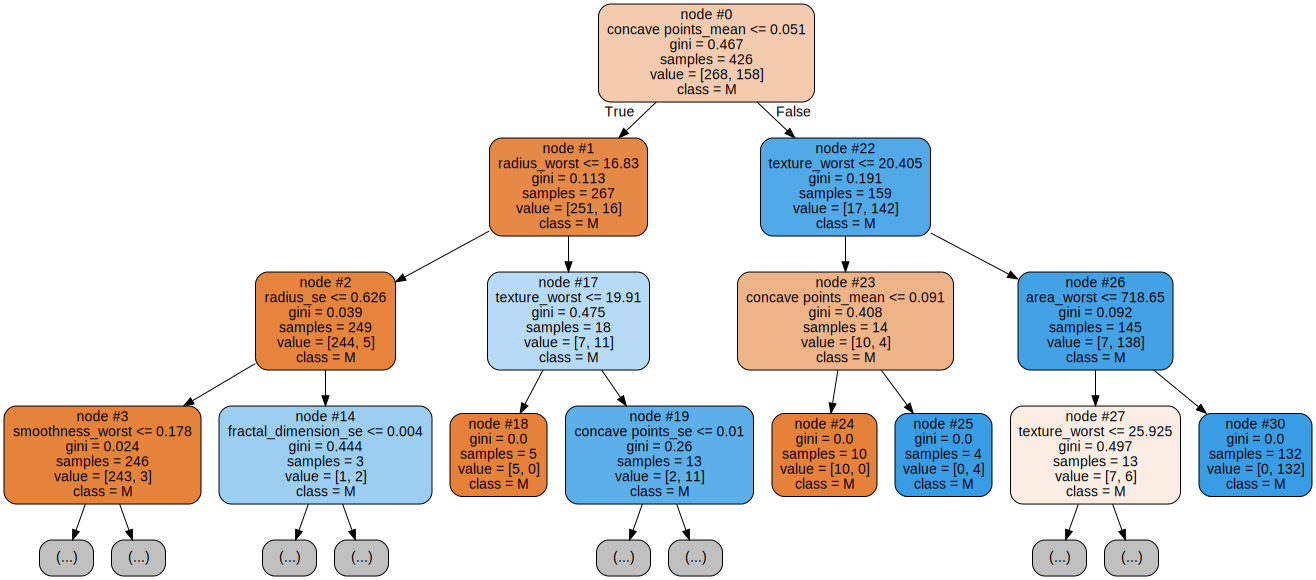

In [81]:
dot_data = tree.export_graphviz(
         arvore2,
         feature_names=X2.columns,
         class_names=y2,
         max_depth=3, 
         filled=True, 
         rounded=True,
         node_ids=True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph

<h1><center>COMPARANDO OS DOIS MODELOS</center></h1>

Podemos observar que mesmo com o aumento da acurácia do modelo (após usarmos no modelo apenas as features mais importantes do modelo anterior), houve uma piora das **métricas de avaliação**. Na precisão do modelo para a classe **M**, houve uma queda de 93% para 89%, e queda no recall da classe **B** e no f1-score de ambas as classes.
           
           
| Classe  |  precisião M1||recall M1  || F1-score  ||  support ||precisão M2|| recall M2||f1-score M2||support||||
|---|----------------------||:-------------||----------||---------||---------||---------||---------||---------||---------||
| B |0.97||0.96 ||0.96||89||0.97||0.93||0.95||89||
| M |0.93||0.94||0.94||54||0.89||0.94||0.92||54||||
  



Também podemos ver que no novo modelo as fetures texture_mean e symmetry_mean deixaram de ser importantes para o novo modelo.


|          Feature     || Nível de importância no modelo 1              ||     Nível de importância no modelo 2     ||
|----------------------||:-------------||----------||
|texture_mean          ||     0.026011 || 0.000000 ||
|concave points_mean   ||     0.724681 || 0.724681 ||
|symmetry_mean         ||     0.006707 || 0.000000 ||
|radius_se             ||     0.012772 || 0.012772 ||
|smoothness_se         ||     0.001555 || 0.001555 ||
|concave points_se     ||     0.017025 || 0.017025 ||
|fractal_dimension_se  ||     0.008384 || 0.006707 ||
|radius_worst          ||     0.058993 || 0.067376 ||
|texture_worst         ||     0.099496 || 0.125507 ||
|area_worst            ||     0.034520 || 0.034520 ||
|smoothness_worst      ||     0.009857 || 0.009857 || 